In [0]:
### Importing Libraries 

# Basic Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import sys
import os

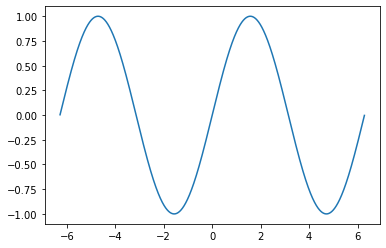

In [33]:
### Sampling Raw Data

x_raw = np.arange(2*(-3.14),2*(3.14),0.0001)
y_raw = np.sin(x_raw)

plt.plot(x_raw,y_raw)

**Time Series for X Prediction from X-1**

In [73]:
### Generation of Data Set

def Generate_Dataset_case_one(x_raw,y_raw):
  
  input_space = x_raw.shape[0]
  
  X = np.zeros((input_space-4,4))
  Y = []
  
  for i in range(input_space-4):

       for j in range(4):
         X[i,j] = (x_raw[i+j])
       Y.append(y_raw[i+4])
  
  Y = np.array(Y)
  return(X,Y)

# Generating the Dataset

X,Y = Generate_Dataset_case_one(x_raw,y_raw)
print(X,Y)

[[-6.28   -6.2799 -6.2798 -6.2797]
 [-6.2799 -6.2798 -6.2797 -6.2796]
 [-6.2798 -6.2797 -6.2796 -6.2795]
 ...
 [ 6.2793  6.2794  6.2795  6.2796]
 [ 6.2794  6.2795  6.2796  6.2797]
 [ 6.2795  6.2796  6.2797  6.2798]] [ 0.0035853  0.0036853  0.0037853 ... -0.0034853 -0.0033853 -0.0032853]


In [0]:
#### Importing Keras Library

from keras import layers
from keras import Model
import keras.backend as K
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [75]:
### Defining Variables and Reshaping X

n_features = 1
X = X.reshape((X.shape[0],X.shape[1],n_features))
print(X.shape)

(125596, 4, 1)


In [0]:
### Developing the Model

model = Sequential()
model.add(LSTM(50,input_shape=(X.shape[1],n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [0]:
### Fitting Model

model.fit(X,Y,epochs=200)

Epoch 1/200
125596/125596 [==============================] - 13s 103us/step - loss: 0.0154 - accuracy: 1.5128e-04
Epoch 2/200
125596/125596 [==============================] - 13s 101us/step - loss: 6.9986e-05 - accuracy: 1.5924e-04
Epoch 3/200
125596/125596 [==============================] - 12s 99us/step - loss: 6.9428e-05 - accuracy: 1.5924e-04
Epoch 4/200
125596/125596 [==============================] - 12s 98us/step - loss: 7.6425e-05 - accuracy: 1.5924e-04
Epoch 5/200
125596/125596 [==============================] - 12s 98us/step - loss: 5.8949e-05 - accuracy: 1.5924e-04
Epoch 6/200
125596/125596 [==============================] - 12s 98us/step - loss: 7.0738e-05 - accuracy: 1.5924e-04
Epoch 7/200
125596/125596 [==============================] - 12s 99us/step - loss: 4.6329e-05 - accuracy: 1.5924e-04
Epoch 8/200
125596/125596 [==============================] - 12s 99us/step - loss: 9.1127e-05 - accuracy: 1.5924e-04
Epoch 9/200
125596/125596 [==============================] - 12s 9

In [0]:
### Predicting Output

def predict_case_one(x_predict):
  
  x_ip = np.array([(x_predict-0.0004),(x_predict-0.0003),(x_predict-0.0002),(x_predict-0.0001)])
  x_ip = x_ip.reshape((1,4,n_features))
  y_op = model.predict(x_ip)

  error = np.linalg.norm(y_op,math.sin(x_predict))

  return(y_op,error)

In [0]:
### Predicting for x_predict = 0

print(predict_case_one(0))

**Predicting X directly for given X**

In [0]:
### Generation of Data Set

def Generate_Dataset_case_two(x_raw,y_raw):
  
  input_space = x_raw.shape[0]
  
  X = np.zeros((input_space-4,4))
  Y = []
  
  for i in range(input_space-4):

       for j in range(4):
         X[i,j] = (x_raw[i+j])
       Y.append(y_raw[i+3])
  
  Y = np.array(Y)
  return(X,Y)

# Generating the Dataset

X,Y = Generate_Dataset_case_two(x_raw,y_raw)
print(X,Y)

In [0]:
### Developing the Model

model = Sequential()
model.add(LSTM(50,input_shape=(X.shape[1],n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [0]:
### Fitting Model

model.fit(X,Y,epochs=200)

In [0]:
### Predicting Output

def predict(x_predict):
  
  x_ip = np.array([(x_predict-0.0003),(x_predict-0.0002),(x_predict-0.0001),(x_predict)])
  x_ip = x_ip.reshape((1,4,n_features))
  y_op = model.predict(x_ip)

  error = np.linalg.norm(y_op,math.sin(x_predict))

  return(y_op,error)

In [0]:
### Predicting for x_predict = 0

print(predict_case_two(0))